# The ORCA Computing Hackathon challenge

Welcome to this hackathon session prepared by ORCA Computing, a leading photonic quantum computing company. This session uses a Jupyter notebook, which is a mix of descriptions using text and images and code that you can run.

As an example, run the following cell by pressing the "play" button:

In [1]:
print(2+2)

4


Congratulations! Feel free to change the contents of the cell above and run the code again. Any code written in the python programming language will run in these cells.

In this session, feel free to run the cells several times, with different values for the parameters. Some cells that contain more complex python code have been hidden, but you are welcome to have a look inside as long as you don't change anything or else the code may not work. 

If at any point you encounter an error or have a question, please don't hesitate to ask our friendly organisers (Jakob, Hugo, Saji, Paris and Tom).

# Basic concepts in Python

Before starting, we will go through the basic concepts of python that you will need to know to do the rest of the hackaton

#### 1. lists
In python, you can define a list of numbers like this :

In [2]:
my_list = [15, 6, 8]
print('my_list = ', my_list)
my_list.append(22)   # list.append(element) adds element to the list
print('x after adding element 22 = ', my_list)
print('Length of x = ', len(my_list))  # len(list) returns the number of elements in the list

my_list =  [15, 6, 8]
x after adding element 22 =  [15, 6, 8, 22]
Length of x =  4


In python, the first element has an index of 0.

In [3]:
print('First element of the list = ', my_list[0])
print('Second element of the list = ', my_list[1])
print('Last element of the list = ', my_list[-1])   # the index -1 allows to get the last element

First element of the list =  15
Second element of the list =  6
Last element of the list =  22


#### 2. the for loops

In python, you can iterate over elements by doing a for loop. Be careful to the indices as the first elenent is 0.

In [4]:
N = 5
for i in range(N): # i will take all the values between 0 and N-1
    print(i)

0
1
2
3
4


In [5]:
N = 10
my_list = []  # create an empty list
for i in range(N): 
    my_list.append(i ** 2)  # add to list the number i ** 2

print('my_list = ', my_list) 

my_list =  [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


#### 3. random numbers

In Python, you can generate a random number between 0 and 1 by doing :

In [7]:
import numpy as np

my_random_number = np.random.uniform()  # each time you re-run this cell, you will get a different number
print('my_random_number = ', my_random_number)

my_random_number =  0.2106724017882079


An other useful function of the numpy library is the **np.random.choice** :

In [8]:
my_random_number = np.random.choice([-1, 1], p=[0.4, 0.6]) # this randomly returns -1 with a probability 0.4 and 1 with a probability 0.6
print('my_random_number = ', my_random_number)

my_random_number =  -1


In [9]:
# An example putting everything together :

my_list_of_random_number = []
for i in range(100):
    number =  np.random.choice([-1, 1], p=[0.7, 0.3])
    my_list_of_random_number.append(number)

print('my_list_of_random_number = ', my_list_of_random_number)

my_list_of_random_number =  [-1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1]


**Question 1** : What does the code above do? What are the proportions of 1 and -1?

70% chance of -1, 30% of 1 - 7:3 split.

# The Galton board

In this session, we will be **showing a concrete effect of quantum physics** by studying the difference between the classical Galton board and its quantum equivalent. 

A Galton board consists of a network of pins over which a ball is dropped. Each time a ball hits a pin, it can go left or right with a probability of 50%. In this problem, we are going to examine the dynamics of this system, and see how the dynamics are different in quantum and classical physics.

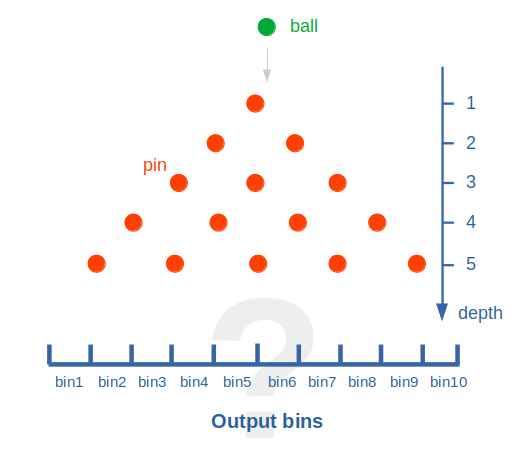

We first need to import a few packages required by our code. Please run the following cell.

In [14]:
pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/40/d9/c1784db9db0d484c8e5deeafbaac0d6ed66e165c6eb4a74fb43a5fa947d9/matplotlib-3.8.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e5/76/94bc17eb868f8c7397f8fdfdeae7661c1b9a35f3a7219da308596e8c252a/contourpy-1.1.1-cp311-cp311-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
  Using cached fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata (154 kB)
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/1e/37/d3c2d4ba2719059a0f12730947bbe1ad5ee8bff89e8c35319dcb2c9ddb4c/kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.me

In [15]:
import numpy as np  # This package helps us do math
import matplotlib.pyplot as plt  # This package helps us make some nice plots
import random  # This package allows us to simulate randome processes

# Part 1: Understanding the classical board

In this section, we consider a classical Galton board where a ball is dropped from the top and bounces from pin to pin (blue circles). The ball starts at position 0. Each time it hits a pin, it can either move by -1 (left) or +1 (right) with a probability of 0.5 for each direction. Assume this remains true when the ball goes from last pin to the bin (red). A random path is drawn in green.

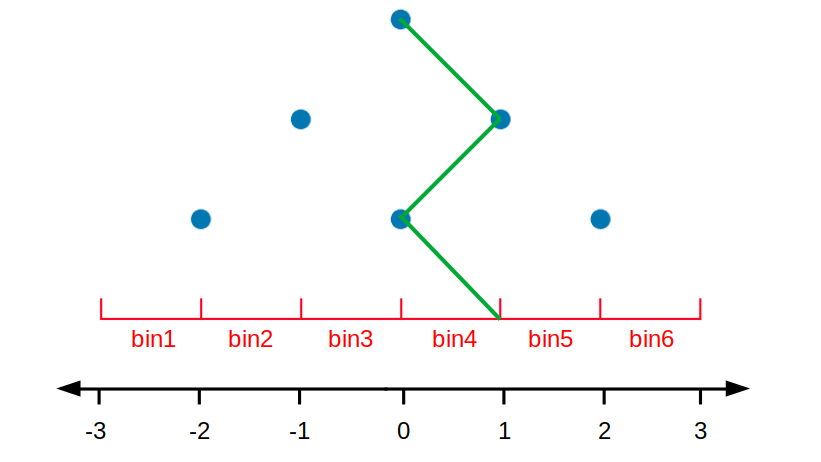

**Question 2:** Is each path equally likely?

Yes

**Question 3:** How many path are possible?

8

**Question 4:** For a Galton board of depth n, where n is a positive integer, is each output equally likely for all values of n? If not, which ones?

No, middle bins are more likely.

**Question 5**: Write the function **get_random_path** that takes as an argument the depth of the Galton board and returns a random path of the ball. The path is a list that shows the successive positions of the ball, from the top pin to the bin it ends up in. For example, the green path is represented by [0,1,0,1]

In [25]:
def get_random_path(depth):
    paths = [0]
    pos = 0
    # HERE: write a code that returns a random list that describes a possible trajectory of the ball
    for i in range(0,depth-1):
        number =  np.random.choice([0, 1], p=[0.5, 0.5])
        rp=number
        paths.append(rp)

    return paths

In [26]:
get_random_path(3)

[0, 1, 1]

**Question 6**: The assumption we made above would mean that the ball ends up at the edge of the bin. In reality, it should end in the middle of the bin. Write some additional code for your **get_random_path** function to ensure that the ball ends up in the middle of the bin. Now assume that the ball moves either -0.5 (left) or +0.5 (right) between the final pin and the middle of the bin. The probability of each direction will remain 0.5

In [29]:
def get_random_path(depth):
    paths = [0]
    pos = 0
    # HERE: write a code that returns a random list that describes a possible trajectory of the ball
    for i in range(0,depth-2):
        number =  np.random.choice([0, 1], p=[0.5, 0.5])
        rp=number
        paths.append(rp)
    number =  np.random.choice([-0.5, 0.5], p=[0.5, 0.5])
    rp = number
    paths.append(rp)


    return paths

In [30]:
get_random_path(3)

[0, 1, 0.5]

## Understanding the outcome probabilities

**Question 7:** What type of distribution will the output of the Galton board follow in the bins if a large number of balls is used?

Normal distribution

**Question 8:** When the depth is d, what is the probability that the ball ends up in the left-most bin? We consider a probability of 0.5 for the ball to go left or right.

0.5**d

## Larger and different Galton boards

**Question 9:** What happens when you increase the depth of the Galton Board?

In [ ]:
def get_random_path(depth):
    paths = [0]
    pos = 0
    prob = 6**(1/3)
    # HERE: write a code that returns a random list that describes a possible trajectory of the ball
    for i in range(0,depth-2):
        number =  np.random.choice([0, 1], p=[1-prob, 6**(1/3))
        rp=number
        paths.append(rp)
    number =  np.random.choice([-0.5, 0.5], p=[0.5, 0.5])
    rp = number
    paths.append(rp)


    return paths

**Question 10:** Up until now, we've been simulating a Galton board where at each step the ball has a 50% chance of going left or right. In real life, if you were given a physical Galton board, what could you do to change this probability?

Move the peg position to adjust the probability of the ball going left or right.

# Part 2: The quantum Galton Board

**Question 11:** Using the idea of changing the probability of the ball going left or right, design a Galton board of
depth 3 such that any given ball will be equally likely 
to land in each of the output bins of the Galton board.

We now consider the same scheme, but instead of sending balls, we imagine that we are sending single photons. A photon is a single particle of light, and is a quantum particle that, as we will see, behaves very differently to a classical object like the balls in a classical Galton board. 

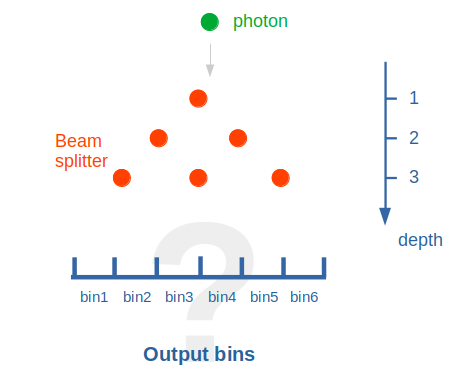

The quantum equivalent of a pin for a photon is something called a beam splitter. A beam splitter is any object that splits a beam of light into a transmitted component and a reflected component. For example, an ordinary window is a type of beam splitter, where most of the light goes through but some is reflected back. A beam splitter with 50% reflectivity will transmit half the light and reflect half the light, which is quite similar to the pins we've been looking at up until now.



However, when we send a single photon onto a beam splitter, **something strange happens**. We observe a phenomenon called **quantum superposition**, where in some cases it looks like the particle has gone both left **AND** right. In the rest of this session, we are going to explore what this means.

In [32]:
# You don't need to understand the code in this cell
def _get_unitary_single(R):

    return np.array([[np.sqrt(1-R), 1j*np.sqrt(R)],
                    [1j*np.sqrt(R), np.sqrt(1-R)]])

def unitary(R, depth):
    
    # 1BS => 2 modes
    # 2 BS => 4 modes
    
    n_modes = 2 * depth 
    
    unitary = np.eye(n_modes, n_modes, dtype=complex)
    
    for i in reversed(range(1, depth+1)):
        u = np.eye(n_modes, dtype=complex)
        for k in reversed(range(i)):
            u[2*k+depth-i:2*k+2+depth-i, 2*k+depth-i:2*k+2+depth-i] = _get_unitary_single(R)
            
        unitary = np.dot(unitary, u)
        #print('u = ', i, u, '\n')
    
    return unitary
    

def sample_quantum(depth=1, n_photons=1):

    R = 0.5
    
    u = unitary(R, depth)
    input_modes = [0]*2*depth
    input_modes[depth] = 1
    amplitudes = np.dot(u, input_modes)
    probabilities = [abs(a)**2 for a in amplitudes]
    #print(probabilities)
    
    if abs(sum(probabilities)-1) > 1e-6:
        raise Exception('probabilities sum not equal to 1')
    
    samples = random.choices(
            np.arange(0,u.shape[0]),
            weights=probabilities,
            k=n_photons
            )
    
    labels, counts = np.unique(samples, return_counts=True)

    plt.bar(labels, counts, align='center')
    plt.gca().set_xticks(labels)
    plt.xlabel('Output bins')
    plt.ylabel('Counts')
    plt.show()

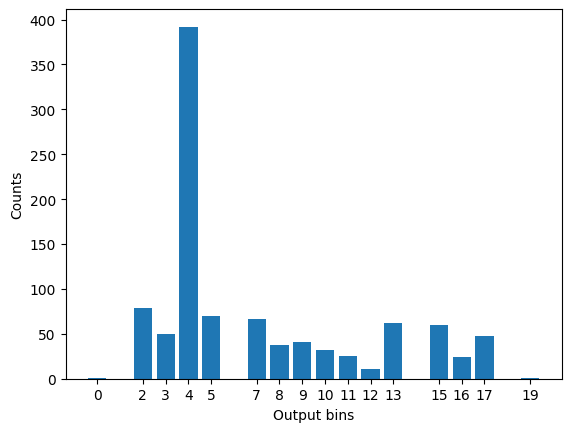

In [42]:
sample_quantum(depth=10, n_photons=1000)


Let's start by investigating a small-scale quantum Galton board, shown below:

The function **sample_quantum** allows to simulate the outputs of this board when we send a quantum particle in.

**Question 13**: What do the output bins of the quantum Galton board represent?

The probability of a specific quantum state of the photon.

**Question 14:** What is the first depth at which there is a difference in the output bins of the classical and quantum Galton boards?

3

**Question 15:** In the case where the depth is 3, how many paths lead to each output bin?

bins 0,1: 1 bin 2: 4 bins 4,5: 1

**Question 16:** How does this experiment illustrate the phenomenon known as **quantum interference**?

going l,r,l leads to destructive interference.

**Question 17**: What do you observe with a deeper quantum Galton board?

there are maxima and minima of intensity - points of constructive and destructive inteference

# Part 3: the double slit experiment

The famous double slit experiment involves sending individual classical or quantum particles towards a pair or narrow slits that disperse them in every direction, and observing where they end up. The following pictures correspond to typical results from this experiment.

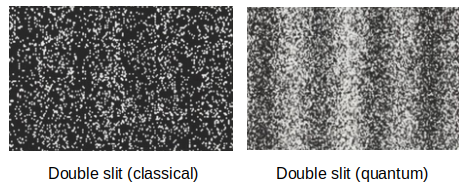

**Question 18:** Can you explain these observations?

**Question 19:** How does the double slit experiment relate to the quantum Galton board? What are properties that they have in common?